<a href="https://colab.research.google.com/github/GabrielaSchmitt/Data-Science-studies/blob/main/%C3%81rvores_de_decis%C3%A3o_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

# 1o passo - carregar os dados

In [2]:
digits = datasets.load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Visualizar os dados

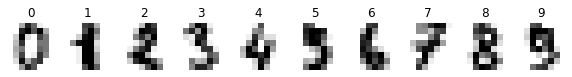

In [4]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

Preparacao de dados

In [5]:
X, y = digits.data, digits.target

In [6]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
y[0]

0

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [10]:
X_test.shape

(540, 64)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [12]:
acuracias = {}
resultados = {}

for depth in range(3, 100):
  clf = DecisionTreeClassifier(max_depth=depth)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  resultados[depth] = y_pred
  accuracy = metrics.accuracy_score(y_test, y_pred)
  acuracias[depth] = accuracy * 100

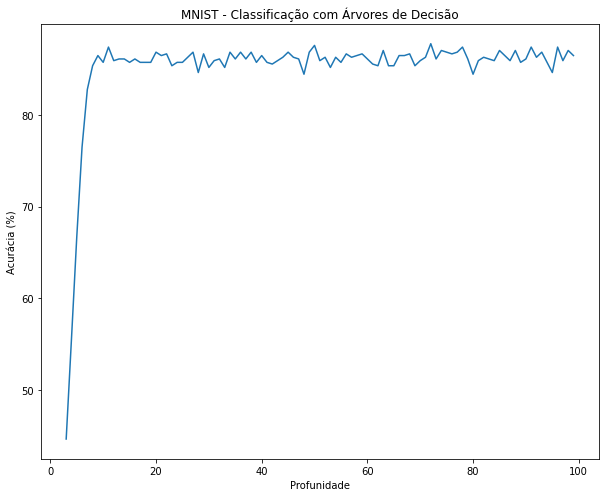

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(list(acuracias.keys()), list(acuracias.values()))
plt.title('MNIST - Classificação com Árvores de Decisão')
plt.xlabel('Profunidade')
plt.ylabel('Acurácia (%)')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, resultados[11])

array([[45,  0,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0, 51,  1,  0,  0,  0,  0,  1,  3,  0],
       [ 0,  1, 48,  2,  1,  0,  0,  0,  2,  0],
       [ 0,  0,  1, 50,  0,  0,  0,  1,  2,  2],
       [ 1,  2,  0,  0, 54,  1,  2,  5,  1,  0],
       [ 0,  0,  1,  1,  2, 54,  3,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  1,  0,  3,  1,  0,  0, 44,  1,  0],
       [ 0,  4,  2,  3,  1,  1,  0,  0, 34,  2],
       [ 1,  0,  3,  1,  0,  1,  0,  3,  1, 41]])

In [15]:
accuracy_score(y_test, resultados[11])

0.8740740740740741

In [16]:
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from sklearn import tree

In [18]:
with open('./tree.dot', 'w') as f:
  f.write(tree.export_graphviz(clf))

In [19]:
!dot -Tpng tree.dot -o tree.png

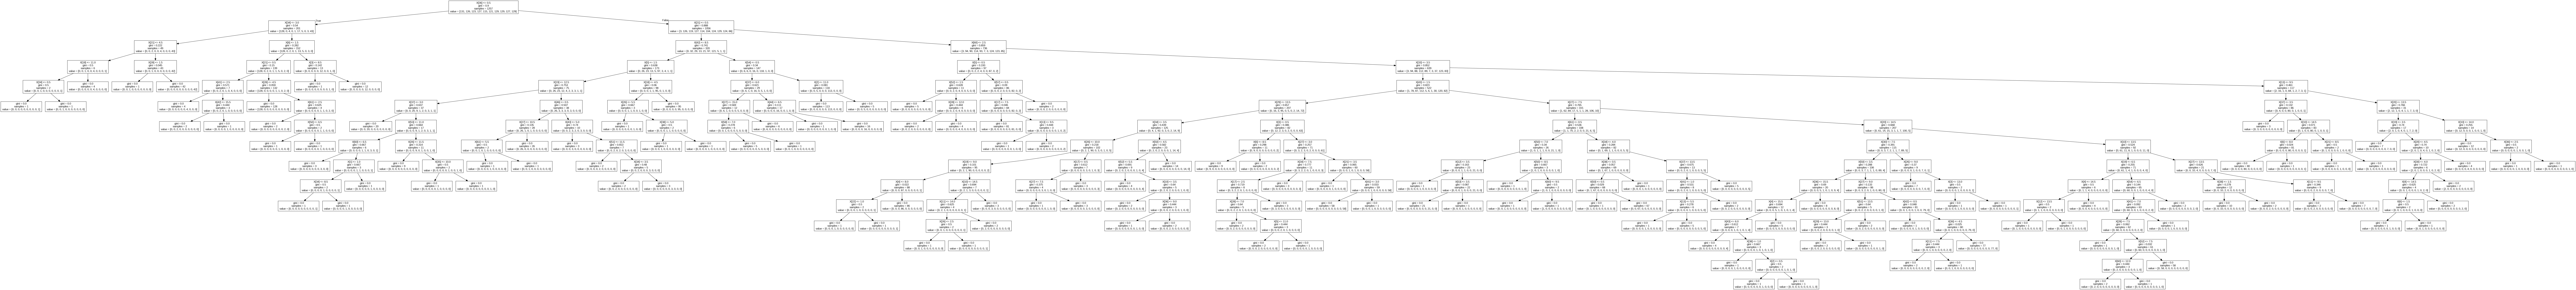

In [20]:
from IPython.display import Image
Image('tree.png')